# Week 2 Homework: Data Exploration 

## Ktown Team - Wilshire Center Koreatown Neighborhood Council 

The Ktown Team is a progressive slate of candidates running for the Wilshire Center Koreatown Neighborhood Council (WCKNC) elections in 2021. I am creating a map of basic demographic, housing, and employment Neighborhood Council boundaries. 


In [1]:
import geopandas as gpd

##### Defining variables for given datasets 


In [2]:
nc = gpd.read_file('AYJ-data/Neighborhood_Council_Boundaries__2018_.shp')       # Neighborhood Council boundaries
ct = gpd.read_file('AYJ-data/ct-ktown.shp')                                     # Census Tracts
d079 = gpd.read_file('AYJ-data/d07910ee-e873-49dd-a5f1-cfa40b8fdf4c2020330-1-ana2u4.8mgs8.shp') # not sure what this is 
wcknc = gpd.read_file('AYJ-data/ktown-council.shp')                          # WCKNC Boundary 
tracts = gpd.read_file('AYJ-data/ktown-tracts-final.shp')                    # Census Tracts within WCKNC 

##### Exploring Contents of Datasets 

Checking data type of Neighborhood Council Boundaries dataset

In [11]:
type(nc)  

geopandas.geodataframe.GeoDataFrame

***all the datasets are .shp, or GeoDataframes

How many Neighborhood Councils are in this dataset?

In [5]:
nc.shape

(99, 16)

--> 96 NCs - three are missing! 

Sample of last five Neighborhood Councils in data set (including WCKNC)

In [13]:
nc.tail()  

,FID,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Shape__Are,Shape__Len,GlobalID,geometry
94,95,Wilmington,2018 Maps/2018 Bylaw Amendments/Boundary Adjus...,11,0,0,-1,0,None,https://empowerla.org/wilmington/,0.441284,0.004160,6.201519e+07,54626.088999,c01da71d-fd40-4f08-8d81-ed6d342014bc,"POLYGON Z ((-118.28303 33.79825 0.00000, -118...."
95,96,Wilshire Center Koreatown,2018 Maps/2018 Bylaw Amendments/Boundary Adjus...,83,0,0,-1,0,None,https://empowerla.org/wcknc,0.130869,0.000609,9.104721e+06,16033.417011,312f72fa-3162-4a8e-ba3e-add9a23f2205,"POLYGON Z ((-118.29172 34.08018 0.00000, -118...."
96,97,Winnetka,2018 Maps/2018 Bylaw Amendments/Boundary Adjus...,73,0,0,-1,0,None,https://empowerla.org/winnetka,0.149399,0.001119,1.676784e+07,18921.778887,b5f28d2a-4359-467b-a358-ae654c3e0014,"POLYGON Z ((-118.58856 34.23547 0.00000, -118...."
97,98,Woodland Hills-Warner Center,2018 Maps/2018 Bylaw Amendments/Boundary Adjus...,73,0,0,-1,0,None,https://empowerla.org/whwcnc,0.330361,0.003942,5.903938e+07,39625.166601,5298b467-1ae1-4278-8f81-332ba41b452c,"POLYGON Z ((-118.56221 34.17312 0.00000, -118...."
98,99,Zapata King,2018 Maps/2018 Bylaw Amendments/Boundary Adjus...,84,0,0,-1,0,None,https://empowerla.org/zknc/,0.092180,0.000531,7.938902e+06,11260.869205,522152e8-c038-4aec-a9e3-a338b83d87b8,"POLYGON Z ((-118.28103 34.01109 0.00000, -118...."


Census Tracts: What information is included? 


In [6]:
ct.columns.to_list() 

['OBJECTID',
 'TRACTCE10',
 'POP',
 'LATPOP_D',
 'WHIPOP_D',
 'BLAPOP_D',
 'AMIPOP_D',
 'ASIPOP_D',
 'HPIPOP_D',
 'OTHPOP_D',
 'MMRPOP_D',
 'VAP',
 'LATVAP_D',
 'WHIVAP_D',
 'BLAVAP_D',
 'AMIVAP_D',
 'ASIVAP_D',
 'HPIVAP_D',
 'OTHVAP_D',
 'MMRVAP_D',
 'H0010001',
 'H0010002',
 'H0010003',
 'TOOLTIP',
 'NLA_URL',
 'geometry']

--> can't tell with just column names


In [7]:
d079.head() 

,OBJECTID,FIPS,COUNTY,STATE,POPULATION,SQMI,ID,sourceCoun,ENRICH_FID,aggregatio,...,INDADMN_CY,INDEDUC_CY,INDHLTH_CY,INDARTS_CY,INDFOOD_CY,INDOTSV_CY,INDPUBL_CY,UNEMP_CY,UNEMPRT_CY,geometry
0,1,06083980100,Santa Barbara,CA,11,196.31,0,US,1,BlockApportionment:US.BlockGroups,...,0,1,1,0,3,0,0,1,10.0,"MULTIPOLYGON (((-119.91715 34.07743, -119.9131..."
1,2,06037599100,Los Angeles,CA,535,131.32,1,US,2,BlockApportionment:US.BlockGroups,...,11,56,31,2,77,50,36,25,6.3,"MULTIPOLYGON (((-118.60443 33.47871, -118.6038..."
2,3,06037599000,Los Angeles,CA,3615,1.18,2,US,3,BlockApportionment:US.BlockGroups,...,71,109,58,150,765,111,33,76,3.7,"POLYGON ((-118.31582 33.34166, -118.31665 33.3..."
3,4,06037670416,Los Angeles,CA,4141,1.37,3,US,4,BlockApportionment:US.BlockGroups,...,96,96,340,0,31,55,20,36,2.0,"POLYGON ((-118.40349 33.76586, -118.40209 33.7..."
4,5,06037670602,Los Angeles,CA,7814,5.51,4,US,5,BlockApportionment:US.BlockGroups,...,100,302,495,48,0,148,36,60,1.8,"POLYGON ((-118.36581 33.76255, -118.36622 33.7..."


In [16]:
d079.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    3744 non-null   int64   
 1   FIPS        3744 non-null   object  
 2   COUNTY      3744 non-null   object  
 3   STATE       3744 non-null   object  
 4   POPULATION  3744 non-null   int64   
 5   SQMI        3744 non-null   float64 
 6   ID          3744 non-null   object  
 7   sourceCoun  3744 non-null   object  
 8   ENRICH_FID  3744 non-null   int64   
 9   aggregatio  3744 non-null   object  
 10  HasData     3744 non-null   int64   
 11  CIVLBFR_CY  3744 non-null   int64   
 12  EMP_CY      3744 non-null   int64   
 13  INDAGRI_CY  3744 non-null   int64   
 14  INDMIN_CY   3744 non-null   int64   
 15  INDCONS_CY  3744 non-null   int64   
 16  INDMANU_CY  3744 non-null   int64   
 17  INDWHTR_CY  3744 non-null   int64   
 18  INDRTTR_CY  3744 non-null   int64   
 19

This looks like population data!

What states are included? 

In [15]:
d079['STATE'].value_counts() 


CA    3744
Name: STATE, dtype: int64

--> CA

What counties are included?

In [8]:
d079['COUNTY'].value_counts() 


Los Angeles       2301
Orange             582
San Bernardino     338
Riverside          338
Ventura            111
San Diego           73
Santa Barbara        1
Name: COUNTY, dtype: int64

 --> LA, Orange, San Bernardino, Riverside, Ventura, SD, Santa Barbara
 
 Let's move onto the next dataset

In [47]:
wcknc.head() # Wilshire Center Koreatown NC boundary  

,FID,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Shape__Are,Shape__Len,GlobalID,geometry
0,96,Wilshire Center Koreatown,2018 Maps/2018 Bylaw Amendments/Boundary Adjus...,83,0,0,-1,0,None,https://empowerla.org/wcknc,0.130869,0.000609,9.104721e+06,16033.417011,312f72fa-3162-4a8e-ba3e-add9a23f2205,"POLYGON Z ((-118.29172 34.08018 0.00000, -118...."


In [45]:
tracts.head() # Census tracts within WCKNC and respective population

,OBJECTID,FIPS,COUNTY,STATE,POPULATION,SQMI,ID,sourceCoun,ENRICH_FID,aggregatio,...,INDADMN_CY,INDEDUC_CY,INDHLTH_CY,INDARTS_CY,INDFOOD_CY,INDOTSV_CY,INDPUBL_CY,UNEMP_CY,UNEMPRT_CY,geometry
0,804,06037211120,Los Angeles,CA,5551,0.22,3,US,804,BlockApportionment:US.BlockGroups,...,140,178,257,54,330,258,102,176,5.9,"POLYGON ((-118.29167 34.06904, -118.28826 34.0..."
1,807,06037211921,Los Angeles,CA,2490,0.04,6,US,807,BlockApportionment:US.BlockGroups,...,133,28,93,10,373,105,26,42,3.0,"POLYGON ((-118.29167 34.06904, -118.29166 34.0..."
2,809,06037212203,Los Angeles,CA,2913,0.04,8,US,809,BlockApportionment:US.BlockGroups,...,317,33,34,0,365,277,0,28,1.6,"POLYGON ((-118.28909 34.06180, -118.28909 34.0..."
3,810,06037212204,Los Angeles,CA,3505,0.08,9,US,810,BlockApportionment:US.BlockGroups,...,221,43,114,0,270,255,13,152,8.0,"POLYGON ((-118.28909 34.06180, -118.28426 34.0..."
4,811,06037212303,Los Angeles,CA,3485,0.06,10,US,811,BlockApportionment:US.BlockGroups,...,154,119,95,98,594,247,0,99,4.4,"POLYGON ((-118.29166 34.06179, -118.29165 34.0..."


##### Mapping datasets 

Mapping the Census tracts within WCKNC 

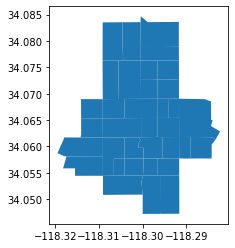

In [17]:
tracts.plot() 

In [19]:
# Define variable and show dataframe for WCKNC Census tracts and population 

tractpop = tracts[['FIPS', 'POPULATION']]
tractpop

,FIPS,POPULATION
0,06037211120,5551
1,06037211921,2490
2,06037212203,2913
3,06037212204,3505
4,06037212303,3485
5,06037213320,2537
6,06037211201,2629
7,06037211202,2765
8,06037211310,3953
9,06037211320,3016


Summary statistics for population within WCKNC

In [20]:
tractpop.describe()

,POPULATION
count,36.000000
mean,3512.666667
std,849.272193
min,1738.000000
25%,2801.000000
50%,3487.000000
75%,4123.250000
max,5551.000000


Define variable for denser than average and less dense than average 

In [21]:
dense = tractpop.query("POPULATION > 3512.666667")
dense

,FIPS,POPULATION
0,06037211120,5551
8,06037211310,3953
11,06037211420,4102
12,06037211703,4791
14,06037211802,4517
15,06037211803,3895
17,06037211910,4494
24,06037212410,3974
28,06037212610,4217
29,06037212620,4218


In [58]:
lessdense = tractpop.query("POPULATION < 3512.666667")
lessdense

,FIPS,POPULATION
1,06037211921,2490
2,06037212203,2913
3,06037212204,3505
4,06037212303,3485
5,06037213320,2537
6,06037211201,2629
7,06037211202,2765
9,06037211320,3016
10,06037211410,3014
13,06037211704,2958


##### Questions for Yoh/TA 

How do I map using a query for the legend? 
i.e. how do I tracts.plot() with denser and less dense tracts marked in different colors?

TypeError: __init__() got an unexpected keyword argument 'loc'

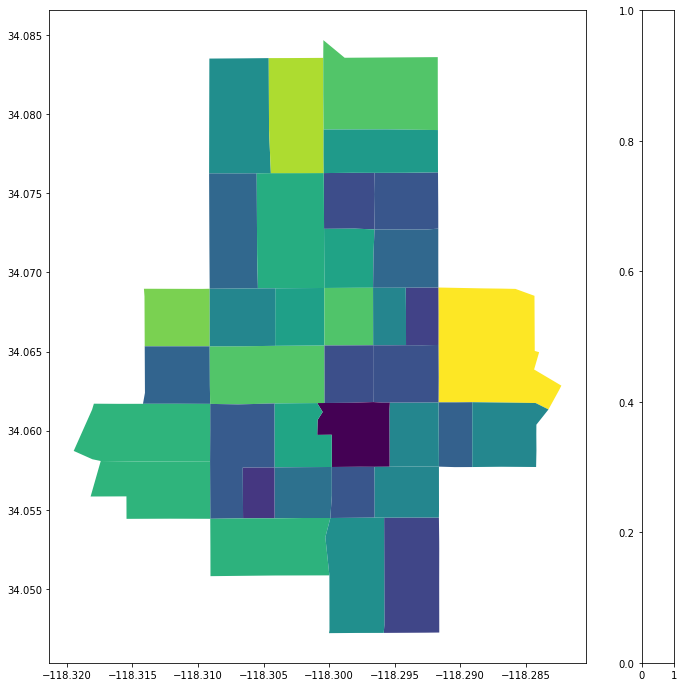

In [61]:
tracts.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'POPULATION',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

In [10]:
tracts.plot(if (dense == TRUE))

SyntaxError: invalid syntax (<ipython-input-10-a072e37a1693>, line 1)

## Real Estate Development Studio
***This is just me playing around with datasets for another class 
##### Site Selection 


In [3]:
church= gpd.read_file('AYJ-data/Churches.shp')  

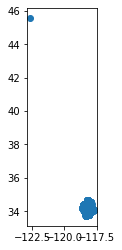

In [4]:
church.plot()

In [6]:
 church.tail()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,geometry
2404,65774,None,None,Community Groups,Churches,None,Brookins Community AME Church,Brookins Community AME Church,4831 S. Gramecy Place,None,...,http://egis3.lacounty.gov/lms/?p=72153,publish,33.999059,-118.314139,2013-08-30,None,None,6.466453e+06,1.822187e+06,POINT (-118.31414 33.99906)
2405,65776,None,None,Community Groups,Churches,None,Crenshaw Christian Center,Crenshaw Christian Center,7901 S. Vermont Avenue,None,...,http://egis3.lacounty.gov/lms/?p=72155,publish,33.967740,-118.291763,2013-12-18,None,None,6.473203e+06,1.810768e+06,POINT (-118.29176 33.96774)
2406,65778,None,None,Community Groups,Churches,None,Personal Involvement Center,Personal Involvement Center,8220 S. San Pedro St.,None,...,http://egis3.lacounty.gov/lms/?p=72158,publish,33.964381,-118.269499,2013-12-18,None,None,6.479950e+06,1.809527e+06,POINT (-118.26950 33.96438)
2407,65780,None,None,Community Groups,Churches,None,Shaback Foursquare Center,Shaback Foursquare Center,4300 W. Slauson Avenue,None,...,http://egis3.lacounty.gov/lms/?p=72160,publish,33.988847,-118.350327,2013-12-18,None,None,6.455472e+06,1.818507e+06,POINT (-118.35033 33.98885)
2408,65782,None,None,Community Groups,Churches,None,Masjid Al-Salaam,Masjid Al-Salaam,2900 W. Florence Avenue,None,...,http://egis3.lacounty.gov/lms/?p=72241,publish,33.974542,-118.324573,2013-08-12,None,None,6.463262e+06,1.813274e+06,POINT (-118.32457 33.97454)
